In [4]:
import pymongo
client = pymongo.MongoClient('raspberrypi')
collection = client['xueqiu']['ceo']
ret = collection.find({})

In [5]:
id_list =[]
created_list =[]
desc_list =[]

for i in ret:
    post_id = i.get('_id')
#     print post_id
    id_list.append(post_id)
    created_time = i.get('created_at')
#     print created_time
    created_list.append(created_time)
    description = i.get('description')
    desc_list.append(description)

In [6]:
len(id_list)

35621

In [7]:
len(created_list)

35621

In [8]:
import datetime

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame({'id':id_list,'create_time':created_list,'description':desc_list})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35621 entries, 0 to 35620
Data columns (total 3 columns):
create_time    35621 non-null datetime64[ns]
description    35621 non-null object
id             35621 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 834.9+ KB


In [12]:
df.sort_values(by='create_time',ascending=False).head()

,create_time,description,id
26,2018-05-12 11:52:49,没什么看法哦。。。,107003703
40,2018-05-12 10:56:43,"回复<a href=""http://xueqiu.com/n/酒肉和尚"" target=""_...",107002242
41,2018-05-12 10:53:57,1、再看看。2、不知道。,107002159
53,2018-05-12 10:51:44,正常的均值回归。如果聪明的父母孩子一定聪明，这个世界会变得非常可怕。你想一下“聪明”的复利。。。,107002092
54,2018-05-12 10:49:10,人与人之间人性差别不是那么大，但是生活境遇差别很大，比如认知能力低下，物质贫困，决策空间狭窄...,107002018


In [13]:
df['daily_time']=map(lambda x:x.time(),df['create_time'])

In [14]:
df.head()

,create_time,description,id,daily_time
0,2018-05-11 14:12:38,"回复<a href=""http://xueqiu.com/n/Stevevai1983"" t...",106959144,14:12:38
1,2018-05-04 14:25:01,"《管理美元》这本书还是很应时的。 <a href=""http://xueqiu.com/n/...",106513097,14:25:01
2,2018-05-11 14:10:56,"回复<a href=""http://xueqiu.com/n/KEVtradroa"" tar...",106958984,14:10:56
3,2018-05-11 14:10:04,我跟她不太熟。。。,106958888,14:10:04
4,2018-05-11 11:00:48,"回复<a href=""http://xueqiu.com/n/暴躁老哥"" target=""_...",106944455,11:00:48


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35621 entries, 0 to 35620
Data columns (total 4 columns):
create_time    35621 non-null datetime64[ns]
description    35621 non-null object
id             35621 non-null int64
daily_time     35621 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.1+ MB


In [16]:
df['day_time']=map(lambda x:x.hour, df['daily_time'])

In [17]:
df.head()

,create_time,description,id,daily_time,day_time
0,2018-05-11 14:12:38,"回复<a href=""http://xueqiu.com/n/Stevevai1983"" t...",106959144,14:12:38,14
1,2018-05-04 14:25:01,"《管理美元》这本书还是很应时的。 <a href=""http://xueqiu.com/n/...",106513097,14:25:01,14
2,2018-05-11 14:10:56,"回复<a href=""http://xueqiu.com/n/KEVtradroa"" tar...",106958984,14:10:56,14
3,2018-05-11 14:10:04,我跟她不太熟。。。,106958888,14:10:04,14
4,2018-05-11 11:00:48,"回复<a href=""http://xueqiu.com/n/暴躁老哥"" target=""_...",106944455,11:00:48,11


In [18]:
df.head()

,create_time,description,id,daily_time,day_time
0,2018-05-11 14:12:38,"回复<a href=""http://xueqiu.com/n/Stevevai1983"" t...",106959144,14:12:38,14
1,2018-05-04 14:25:01,"《管理美元》这本书还是很应时的。 <a href=""http://xueqiu.com/n/...",106513097,14:25:01,14
2,2018-05-11 14:10:56,"回复<a href=""http://xueqiu.com/n/KEVtradroa"" tar...",106958984,14:10:56,14
3,2018-05-11 14:10:04,我跟她不太熟。。。,106958888,14:10:04,14
4,2018-05-11 11:00:48,"回复<a href=""http://xueqiu.com/n/暴躁老哥"" target=""_...",106944455,11:00:48,11


In [19]:
df = df.set_index('create_time',drop=True)

In [20]:
df

,description,id,daily_time,day_time
create_time,,,,
2018-05-11 14:12:38,"回复<a href=""http://xueqiu.com/n/Stevevai1983"" t...",106959144,14:12:38,14
2018-05-04 14:25:01,"《管理美元》这本书还是很应时的。 <a href=""http://xueqiu.com/n/...",106513097,14:25:01,14
2018-05-11 14:10:56,"回复<a href=""http://xueqiu.com/n/KEVtradroa"" tar...",106958984,14:10:56,14
2018-05-11 14:10:04,我跟她不太熟。。。,106958888,14:10:04,14
2018-05-11 11:00:48,"回复<a href=""http://xueqiu.com/n/暴躁老哥"" target=""_...",106944455,11:00:48,11
2018-05-11 14:09:38,我没有什么理解。。。,106958839,14:09:38,14
2018-05-11 14:09:23,还没有具体的产品吧。我不是“一般投资者”，所以我不知道他们怎么看。,106958821,14:09:23,14
2018-05-12 00:04:31,"回复<a href=""http://xueqiu.com/n/yu4ever"" target...",106993086,00:04:31,0
2018-05-10 23:38:04,看法没有什么变化，都没几天呢。你种棵庄稼，老拔出来看长根没有，那不把庄稼看死了啊。利益披露：...,106917463,23:38:04,23


In [73]:
d={}
for i in range(1,13): 
#     print 'month:{}'.format(i)
    for name,group in df['2017-{}'.format(str(i).zfill(2))].groupby('day_time'):
        d.setdefault(name,0)
        d[name]+=len(group)
#         print name,len(group)
        
result = sorted(d.items(),key=lambda x:x[1],reverse=True)
print result

[(11, 963), (10, 772), (22, 723), (12, 652), (16, 649), (14, 633), (13, 608), (23, 605), (15, 562), (17, 562), (9, 540), (21, 445), (18, 431), (20, 302), (19, 293), (8, 157), (0, 150), (7, 45), (1, 12), (6, 7), (4, 6), (2, 5), (3, 3), (5, 2)]


In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

In [75]:
new_d = sorted(result,key=lambda x:x[0],reverse=False)
new_d

[(0, 150),
 (1, 12),
 (2, 5),
 (3, 3),
 (4, 6),
 (5, 2),
 (6, 7),
 (7, 45),
 (8, 157),
 (9, 540),
 (10, 772),
 (11, 963),
 (12, 652),
 (13, 608),
 (14, 633),
 (15, 562),
 (16, 649),
 (17, 562),
 (18, 431),
 (19, 293),
 (20, 302),
 (21, 445),
 (22, 723),
 (23, 605)]

In [76]:
l = range(0,24)
    

In [77]:
l

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [78]:
index = 0
ret_dict = dict(new_d)
for i in range(24):
    if i not in ret_dict.keys():
        ret_dict[i]=0
    

In [79]:
print ret_dict

{0: 150, 1: 12, 2: 5, 3: 3, 4: 6, 5: 2, 6: 7, 7: 45, 8: 157, 9: 540, 10: 772, 11: 963, 12: 652, 13: 608, 14: 633, 15: 562, 16: 649, 17: 562, 18: 431, 19: 293, 20: 302, 21: 445, 22: 723, 23: 605}


In [98]:
import numpy as np
x = ret_dict.keys()
y =ret_dict.values()
x=np.array(x)
y=np.array(y)
y = np.around(y/365.00,3)

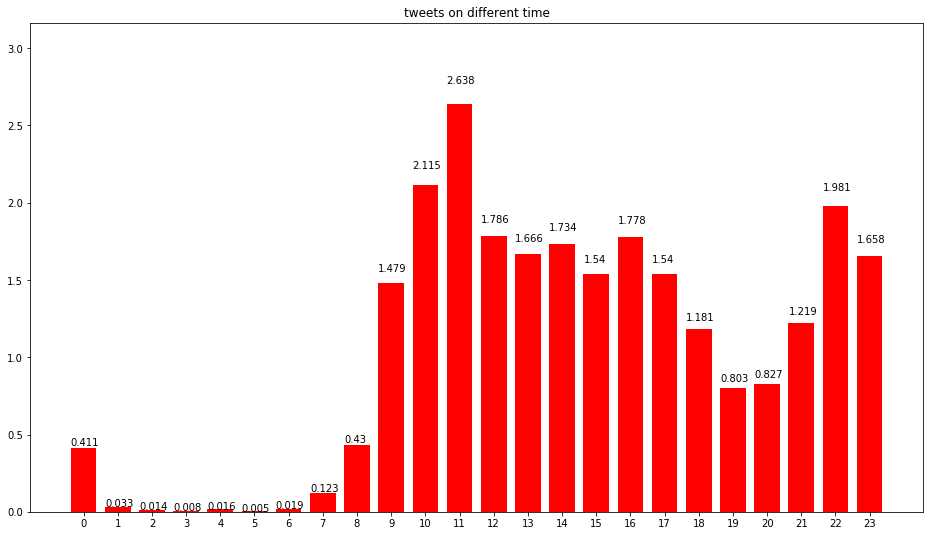

In [101]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x(), 1.05*height, '%s'%height)
fig = plt.figure(figsize=(16,9))
plt.title(u'tweets on different time of xueqiu CEO')
plt.xticks(x[::1])
plt.ylim((0,max(y)+max(y)*0.2))
rect=plt.bar(x,y,width=0.75, align="center", yerr=0.0001,color='r')
autolabel(rect)
